### Проект 3 [Медицинские расходы]

Вам предоставляется набор данных, содержащий информацию о медицинских расходах. Набор данных уже разделен на ```train.csv``` и ```test.csv```. Файл ```data_description.txt``` содержит описание столбцов.

**Цель:** построить модели для прогнозирования **медицинских расходов** (```"charges"```).

Пожалуйста, включите подробные объяснения следующих шагов:

1. Очистка, предварительная обработка данных

2. Обучение и проверка моделей.

3. Сравнение моделей на основе метрик регрессии.

**Примечание:** вам **рекомендуется** искать другие алгоритмы машинного обучения в Интернете (не ограничиваясь материалом курса), но вы должны изучить и понять эти алгоритмы. Вы не можете удалить ни одну строку в файле ```test.csv```.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_orig = pd.read_csv("train.csv")

In [3]:
train_orig.head()

,age,sex,bmi,children,smoker,region,charges
0,34,male,42.900,1,no,southwest,4536.25900
1,61,female,36.385,1,yes,northeast,48517.56315
2,60,male,25.740,0,no,southeast,12142.57860
3,44,female,29.810,2,no,southeast,8219.20390
4,40,female,29.600,0,no,southwest,5910.94400


In [4]:
train = train_orig.copy()

In [5]:
test_orig = pd.read_csv("test.csv")

In [6]:
test_orig.head()

,age,sex,bmi,children,smoker,region,charges
0,57,female,31.160,0,yes,northwest,43578.93940
1,61,female,39.100,2,no,southwest,14235.07200
2,61,male,23.655,0,no,northeast,13129.60345
3,59,male,29.700,2,no,southeast,12925.88600
4,19,female,28.880,0,yes,northwest,17748.50620


In [7]:
test = test_orig.copy()

## 1. Очистка, предварительная обработка данных

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 7 columns):
age         1205 non-null int64
sex         1205 non-null object
bmi         1205 non-null float64
children    1205 non-null int64
smoker      1205 non-null object
region      1205 non-null object
charges     1205 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.0+ KB


In [9]:
train.describe()

,age,bmi,children,charges
count,1205.000000,1205.000000,1205.000000,1205.000000
mean,38.913693,30.675950,1.103734,13135.971538
std,13.904128,6.122464,1.211117,12029.499221
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4670.640000
50%,39.000000,30.400000,1.000000,9283.562000
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


С помощью метода `describe()` мы можем проанализировать признаки с числовыми значениями. Как мы можем заметить, максимальные и минимальные значения вполне разумные. Проверим признаки визуально.

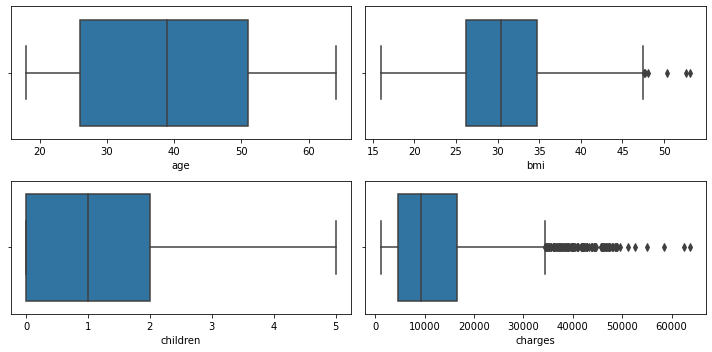

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
plt.subplot(221)
sns.boxplot(x=train["age"])
plt.tight_layout()
plt.subplot(222)
sns.boxplot(x=train["bmi"])
plt.tight_layout()
plt.subplot(223)
sns.boxplot(x=train["children"])
plt.tight_layout()
plt.subplot(224)
sns.boxplot(x=train["charges"])
plt.tight_layout()

Признаки age и children не имеют outliers. Charges является целевым признаком, поэтому рассмотрим подробнее лишь bmi.

Судя по информации взятой <a href="https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html" target="_blank">здесь</a>, можно определить bmi больше 30 как "ожирение" (obesity).
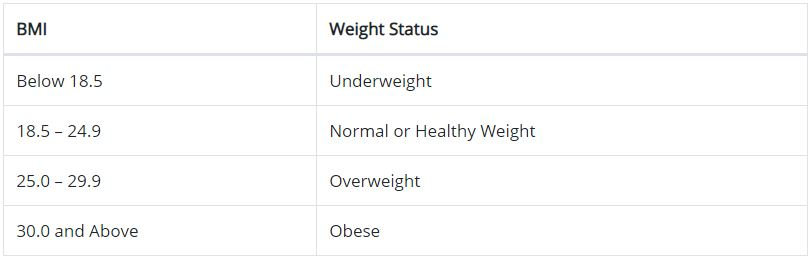  
  
В выборке `train`, однако, существуют значения вплоть до 53. Судя по <a href="https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi_tbl2.htm" target="_blank">информации</a>, подобные значения все же могут встречаться.
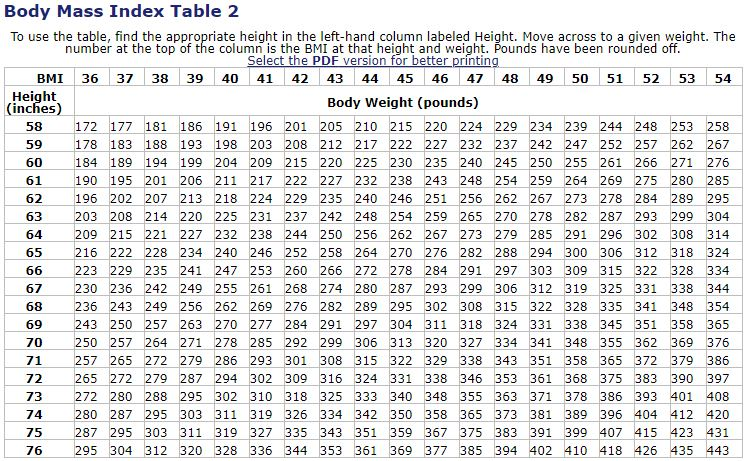  
  
  
Выходит, что все значения признаков вполне разумны и в чистке не нуждаются. Далее рассмотрим категориальные признаки и их распределение.

In [11]:
train["sex"].value_counts()

male      604
female    601
Name: sex, dtype: int64

In [12]:
train["smoker"].value_counts()

no     963
yes    242
Name: smoker, dtype: int64

In [13]:
train["region"].value_counts()

southeast    333
northwest    292
southwest    290
northeast    290
Name: region, dtype: int64

Выходит, что все значения столбцов в полном порядке. Чистка не нужна. Нужно лишь преобразовать категорийные данные.

In [14]:
train

,age,sex,bmi,children,smoker,region,charges
0,34,male,42.900,1,no,southwest,4536.25900
1,61,female,36.385,1,yes,northeast,48517.56315
2,60,male,25.740,0,no,southeast,12142.57860
3,44,female,29.810,2,no,southeast,8219.20390
4,40,female,29.600,0,no,southwest,5910.94400
...,...,...,...,...,...,...,...
1200,44,female,27.500,1,no,southwest,7626.99300
1201,37,female,17.290,2,no,northeast,6877.98010
1202,21,female,25.800,0,no,southwest,2007.94500
1203,30,male,38.830,1,no,southeast,18963.17192


In [15]:
test

,age,sex,bmi,children,smoker,region,charges
0,57,female,31.160,0,yes,northwest,43578.93940
1,61,female,39.100,2,no,southwest,14235.07200
2,61,male,23.655,0,no,northeast,13129.60345
3,59,male,29.700,2,no,southeast,12925.88600
4,19,female,28.880,0,yes,northwest,17748.50620
...,...,...,...,...,...,...,...
128,56,male,40.300,0,no,southwest,10602.38500
129,61,female,22.040,0,no,northeast,13616.35860
130,49,female,42.680,2,no,southeast,9800.88820
131,43,male,27.360,3,no,northeast,8606.21740


## 2. Обучение и проверка моделей

Так как мы пока не знаем, какие из признаков окажутся наиболее значимыми при регрессии, стоит учесть все. Однако, часть из признаков является категорийными, следовательно, нужно использовать Encoding для того, чтобы перевести категорийные данные в численные.

In [16]:
object_cols = []
num_cols = []
others = []

for col in train.columns:
    if train[col].dtype == "O":
        object_cols.append(col)
    elif train[col].dtype == "int64" or train[col].dtype == "float64":
        num_cols.append(col)
    else:
        others.append(col)
print(object_cols)
print(num_cols)
print(others)
        

['sex', 'smoker', 'region']
['age', 'bmi', 'children', 'charges']
[]


Теперь используем One-Hot Encoding, так как порядок в категорийных данных не важен.

In [17]:
train_onehot = pd.get_dummies(train[object_cols])
test_onehot = pd.get_dummies(test[object_cols])

train_numed = pd.concat([train[num_cols],train_onehot], axis=1)
test_numed = pd.concat([test[num_cols],test_onehot], axis=1)

In [18]:
train_numed

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,34,42.900,1,4536.25900,0,1,1,0,0,0,0,1
1,61,36.385,1,48517.56315,1,0,0,1,1,0,0,0
2,60,25.740,0,12142.57860,0,1,1,0,0,0,1,0
3,44,29.810,2,8219.20390,1,0,1,0,0,0,1,0
4,40,29.600,0,5910.94400,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,44,27.500,1,7626.99300,1,0,1,0,0,0,0,1
1201,37,17.290,2,6877.98010,1,0,1,0,1,0,0,0
1202,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1
1203,30,38.830,1,18963.17192,0,1,1,0,0,0,1,0


In [19]:
test_numed

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,57,31.160,0,43578.93940,1,0,0,1,0,1,0,0
1,61,39.100,2,14235.07200,1,0,1,0,0,0,0,1
2,61,23.655,0,13129.60345,0,1,1,0,1,0,0,0
3,59,29.700,2,12925.88600,0,1,1,0,0,0,1,0
4,19,28.880,0,17748.50620,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
128,56,40.300,0,10602.38500,0,1,1,0,0,0,0,1
129,61,22.040,0,13616.35860,1,0,1,0,1,0,0,0
130,49,42.680,2,9800.88820,1,0,1,0,0,0,1,0
131,43,27.360,3,8606.21740,0,1,1,0,1,0,0,0


Количество признаков - 12, включая целевой "Charges". Выбирать из них самые коррелирующие нет необходимости.

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def train_multiple_lin_poly_regressor(data,parameters,target = "SalePrice", degree=1,interaction_only=False):
    regressors = {}
    regressors["degree"] = degree
    
    pol_features = PolynomialFeatures(degree, interaction_only = interaction_only)
    regressors["feature"] = pol_features
    
    pol_features = pol_features.fit_transform(data[parameters].values)
    regressors["parameters"] = parameters
    
    pol_regressor = LinearRegression()
    pol_regressor.fit(pol_features, data[target].values)
    
    regressors["regressor"] = pol_regressor
    
    return regressors

important = train_numed.columns.tolist()
important.remove("charges")
model_lin = train_multiple_lin_poly_regressor(train_numed, important, target="charges")
print(model_lin)

{'degree': 1, 'feature': PolynomialFeatures(degree=1), 'parameters': ['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest'], 'regressor': LinearRegression()}


In [21]:
def validation(model, data,target = "SalePrice"):
    pd_val = pd.DataFrame(data, columns = [target])
    col_pred = ""
    for i in model["parameters"]:
        col_pred = col_pred + f"{i}-"
    col_pred = col_pred[:-1]
    pol_features = model["feature"].fit_transform(data[model["parameters"]].values)
    pd_val[col_pred] = model["regressor"].predict(pol_features).astype(int)
    rmse = (np.mean((pd_val[target]-pd_val[col_pred])**2)**(1/2))
    return pd_val,rmse

pd_predictions_lin, rmse_lin = validation(model_lin, test_numed, target="charges")
print(rmse_lin)
pd_predictions_lin

5982.161589611468


,charges,age-bmi-children-sex_female-sex_male-smoker_no-smoker_yes-region_northeast-region_northwest-region_southeast-region_southwest
0,43578.93940,36508
1,14235.07200,16916
2,13129.60345,11715
3,12925.88600,13045
4,17748.50620,26130
...,...,...
128,10602.38500,14857
129,13616.35860,11431
130,9800.88820,15235
131,8606.21740,9845


Minimum RMSE of 5053.33 has been achieved at 2-degree Multiple Linear Polynomial Regression model.


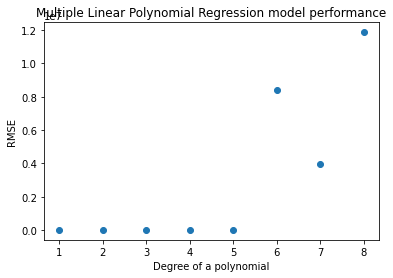

In [22]:
multiple_lin_poly = {}
for i in range(1,9):
    models = train_multiple_lin_poly_regressor(train_numed, important, target="charges", degree=i)
    pd_predictions_vals, rmse_vals = validation(models, test_numed, target="charges") 
    multiple_lin_poly[i] = rmse_vals

key_list = list(multiple_lin_poly.keys())
val_list = list(multiple_lin_poly.values())
val_minimum = min(val_list)
key_minimum = key_list[val_list.index(val_minimum)]
print(f"Minimum RMSE of {val_minimum:.2f} has been achieved at {key_minimum}-degree Multiple Linear Polynomial Regression model.")
plt.scatter(multiple_lin_poly.keys(),multiple_lin_poly.values(),
           color = "tab:blue")
plt.title("Multiple Linear Polynomial Regression model performance")
plt.xlabel("Degree of a polynomial")
plt.ylabel("RMSE");

In [23]:
from sklearn.ensemble import RandomForestRegressor

def train_random_forest_regressor(data,parameters,target="SalePrice",n_estimators=1,random_state=0):
    regressors = {}
    regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    regressor.fit(data[parameters].values, data[target].values)
    
    regressors["regressor"] = regressor
    regressors["parameters"] = parameters

    return regressors
    
#Конец вашего кода
model_rf = train_random_forest_regressor(train_numed, important, target="charges", n_estimators=1)
print(model_rf)

{'regressor': RandomForestRegressor(n_estimators=1, random_state=0), 'parameters': ['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']}


In [24]:
def validation_rf(model,data,target = "SalePrice"):
    pd_val = pd.DataFrame(data, columns = [target])
    col_pred = ""
    for i in model["parameters"]:
        col_pred = col_pred + f"{i}-"
    col_pred = col_pred[:-1]
    random_forest_features = data[model["parameters"]].values
    pd_val[col_pred] = model["regressor"].predict(random_forest_features).astype(int)
    rmse = (np.mean((data[target]-pd_val[col_pred])**2)**(1/2))
    return pd_val,rmse

pd_predictions_rf, rmse_rf = validation_rf(model_rf, test_numed, target="charges")
print(rmse_rf)
pd_predictions_rf.head()

6180.919803800083


,charges,age-bmi-children-sex_female-sex_male-smoker_no-smoker_yes-region_northeast-region_northwest-region_southeast-region_southwest
0,43578.93940,43813
1,14235.07200,13470
2,13129.60345,12523
3,12925.88600,11743
4,17748.50620,17468


Minimum RMSE of 4562.95 has been achieved at 51-sized RF model.


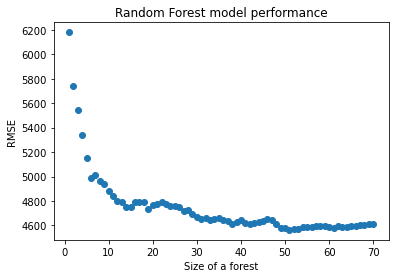

In [25]:
rand_forest = {}
for i in range(1,71):
    models_rf = train_random_forest_regressor(train_numed, important, target="charges", n_estimators=i)
    pd_predictions_vals_rf, rmse_vals_rf = validation_rf(models_rf, test_numed, target="charges") 
    rand_forest[i] = rmse_vals_rf

key_list_rf = list(rand_forest.keys())
val_list_rf = list(rand_forest.values())
val_minimum_rf = min(val_list_rf)
key_minimum_rf = key_list_rf[val_list_rf.index(val_minimum_rf)]
print(f"Minimum RMSE of {val_minimum_rf:.2f} has been achieved at {key_minimum_rf}-sized RF model.")
plt.scatter(rand_forest.keys(),rand_forest.values(),
           color = "tab:blue")
plt.title("Random Forest model performance")
plt.xlabel("Size of a forest")
plt.ylabel("RMSE");

In [26]:
from sklearn.svm import SVR

#Начало вашего кода
def support_vector_regression(data, parameters, target, kernel = "linear", degree = 3, epsilon = 0.1):
    reg_dict = {}
    
    regressor = SVR(kernel = kernel, degree = degree, epsilon = epsilon)
    regressor.fit(data[parameters].values, data[target].values)
    
    reg_dict["regressor"] = regressor
    reg_dict["parameters"] = parameters
    
    return reg_dict
#Конец вашего кода

model_svr = support_vector_regression(train_numed,important,"charges",epsilon=0.1)
print(model_svr)

{'regressor': SVR(kernel='linear'), 'parameters': ['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']}


In [27]:
def validation_svr(model, data,  target = "SalePrice"):    
    pd_val = pd.DataFrame(data, columns = [target])
    
    col_pred = ""
    for i in model["parameters"]:
        col_pred = col_pred + f"{i}-"
    col_pred = col_pred[:-1]
    
    svr_features = data[model["parameters"]].values
    pd_val[col_pred] = model["regressor"].predict(svr_features).astype(int)
    rmse = (np.mean((pd_val[target]-pd_val[col_pred])**2)**(1/2))
    return pd_val, rmse

pd_predictions_svr, rmse_svr = validation_svr(model_svr, test_numed, target="charges")
print(rmse_svr)
pd_predictions_svr.head()

13507.621530932849


,charges,age-bmi-children-sex_female-sex_male-smoker_no-smoker_yes-region_northeast-region_northwest-region_southeast-region_southwest
0,43578.93940,12298
1,14235.07200,13332
2,13129.60345,12798
3,12925.88600,12695
4,17748.50620,2247


Minimum RMSE of 11792.22 has been achieved at 16-degree polynomial SVR model.


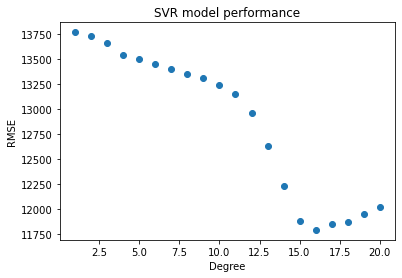

In [28]:
svr_deg = {}
for deg in range(1,21,1):
    models_deg = support_vector_regression(train_numed, important, target="charges", kernel = "poly",degree=deg, epsilon =0.1)
    pd_predictions_vals_deg, rmse_vals_deg = validation_svr(models_deg, test_numed, target="charges") 
    svr_deg[deg] = rmse_vals_deg

key_list_deg = list(svr_deg.keys())
val_list_deg = list(svr_deg.values())
val_minimum_deg = min(val_list_deg)
key_minimum_deg = key_list_deg[val_list_deg.index(val_minimum_deg)]
print(f"Minimum RMSE of {val_minimum_deg:.2f} has been achieved at {key_minimum_deg}-degree polynomial SVR model.")
plt.scatter(svr_deg.keys(),svr_deg.values(),
           color = "tab:blue")
plt.title("SVR model performance")
plt.xlabel("Degree")
plt.ylabel("RMSE");

Minimum RMSE of 13765.19 has been achieved at 0.0-epsiloned SVR model.


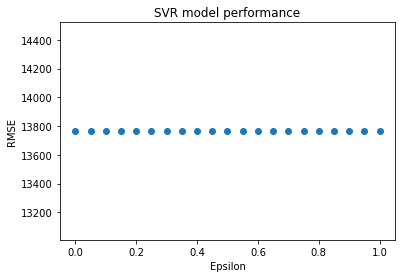

In [29]:
svr_rbf = {}
for eps in np.arange(0,1.05,0.05):
    models_rbf = support_vector_regression(train_numed, important, target="charges", kernel = "rbf", epsilon =eps )
    pd_predictions_vals_rbf, rmse_vals_rbf = validation_svr(models_rbf, test_numed, target="charges") 
    svr_rbf[eps] = rmse_vals_rbf

key_list_rbf = list(svr_rbf.keys())
val_list_rbf = list(svr_rbf.values())
val_minimum_rbf = min(val_list_rbf)
key_minimum_rbf = key_list_rbf[val_list_rbf.index(val_minimum_rbf)]
print(f"Minimum RMSE of {val_minimum_rbf:.2f} has been achieved at {key_minimum_rbf}-epsiloned SVR model.")
plt.scatter(svr_rbf.keys(),svr_rbf.values(),
           color = "tab:blue")
plt.title("SVR model performance")
plt.xlabel("Epsilon")
plt.ylabel("RMSE");

Для того, чтобы выбрать алгоритм машинного обучения я использовал схему
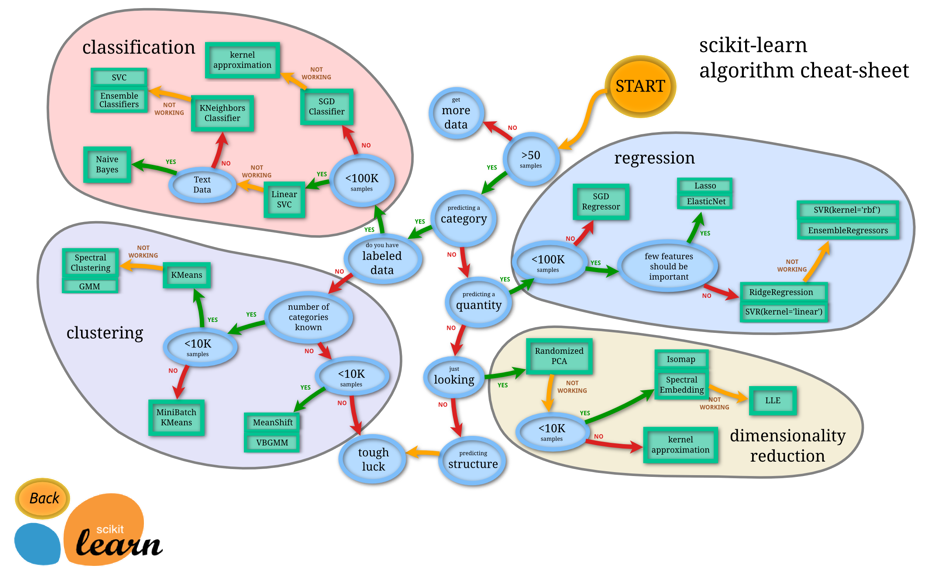


Так как у нас задача регрессии и длина выборки меньше 100 тысяч, а некоторые признаки являются важными, то остановимся на Эластичной Сети (Elastic Net).  
Этот метод основывается на регрессии методом наименьших квадратов с использованием одновременно двух видов регуляризации весов признаков, чтобы избежать излишнюю сложность модели или тенденции к переобучаемости, а также для избежания подсчета незначительных признаков для уменьшения потребления ресурса компьютера.

In [30]:
from sklearn.linear_model import ElasticNet

def train_Elastic_regressor(data,parameters,target):
    regressors = {}
    regressor = ElasticNet()
    regressor.fit(data[parameters].values,data[target].values)
    
    regressors["regressor"] = regressor
    regressors["parameters"] = parameters
    
    return regressors

model_Elastic = train_Elastic_regressor(train_numed,important,target="charges")
print(model_Elastic)

{'regressor': ElasticNet(), 'parameters': ['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']}


In [31]:
def validation_Elastic(model,data,target = "SalePrice"):
    pd_val = pd.DataFrame(data, columns = [target])
    col_pred = ""
    for i in model["parameters"]:
        col_pred = col_pred + f"{i}-"
    col_pred = col_pred[:-1]
    elastic_features = data[model["parameters"]].values
    pd_val[col_pred] = model["regressor"].predict(elastic_features).astype(int)
    rmse = (np.mean((data[target]-pd_val[col_pred])**2)**(1/2))
    return pd_val,rmse

pd_predictions_Elastic, rmse_Elastic = validation_Elastic(model_Elastic, test_numed, target="charges")
print(rmse_Elastic)
pd_predictions_Elastic.head()

8820.33267520721


,charges,age-bmi-children-sex_female-sex_male-smoker_no-smoker_yes-region_northeast-region_northwest-region_southeast-region_southwest
0,43578.93940,24467
1,14235.07200,19349
2,13129.60345,14413
3,12925.88600,16481
4,17748.50620,14390


## 3. Сравнение моделей на основе метрик регрессии.

Сравнение по метрикам RMSE мы уже проделали ранее.

In [32]:
print(f"{key_minimum}-degree multiple polynomial linear regression model RMSE: {val_minimum:30.2f}")
print(f"{key_minimum_rf}-sized Random Forest model RMSE: {val_minimum_rf:54.2f}")
print(f"Linear-kernelled 0.1-epsiloned Support Vector Regression model RMSE: {rmse_svr:20.2f}")
print(f"{key_minimum_deg}-degree poly-kernelled 0.1-epsiloned Support Vector Regression model RMSE: {val_minimum_deg:12.2f}")
print(f"RBF-kernelled {key_minimum_rbf}-epsiloned Support Vector Regression model RMSE: {val_minimum_rbf:23.2f}")
print(f"Elastic Net model RMSE: {rmse_Elastic:65.2f}")

2-degree multiple polynomial linear regression model RMSE:                        5053.33
51-sized Random Forest model RMSE:                                                4562.95
Linear-kernelled 0.1-epsiloned Support Vector Regression model RMSE:             13507.62
16-degree poly-kernelled 0.1-epsiloned Support Vector Regression model RMSE:     11792.22
RBF-kernelled 0.0-epsiloned Support Vector Regression model RMSE:                13765.19
Elastic Net model RMSE:                                                           8820.33


Сравним модели по остальным метрикам: MSE, MAE, R2, adjusted R2.

In [33]:
import sklearn.metrics as metrics

def calc_adjusted_r2(truth,preds,k=1):
    n = len(truth)
    adj_r2 = 1 - (n - 1)*(1-metrics.r2_score(truth,preds))/(n-k-1)
    return adj_r2
pds = []

In [34]:
model_lin =train_multiple_lin_poly_regressor(train_numed, important, target="charges", degree=key_minimum)
pd_predictions_lin, rmse_lin = validation(model_lin, test_numed, target="charges")
pds.append(pd_predictions_lin)

model_rf = train_random_forest_regressor(train_numed, important, target="charges", n_estimators=key_minimum_rf)
pd_predictions_rf, rmse_rf = validation_rf(model_rf, test_numed, target="charges")
pds.append(pd_predictions_rf)

pd_predictions_svr, rmse_svr
pds.append(pd_predictions_svr)

model_deg = support_vector_regression(train_numed, important, target="charges", kernel = "poly", degree =key_minimum_deg, epsilon =0.11 )
pd_predictions_deg, rmse_deg = validation_svr(model_deg, test_numed, target="charges")
pds.append(pd_predictions_deg)

model_rbf = support_vector_regression(train_numed, important, target="charges", kernel = "rbf", epsilon =0.11 )
pd_predictions_rbf, rmse_rbf = validation_svr(model_rbf, test_numed, target="charges")
pds.append(pd_predictions_rbf)

model_Elastic = train_Elastic_regressor(train_numed, important, target="charges")
pd_predictions_Elastic, rmse_Elastic = validation_Elastic(model_Elastic, test_numed, target="charges")
pds.append(pd_predictions_Elastic)

In [35]:
import pandas as pd

names = ["RMSE","MSE","MAE","R-squared","Adjusted R-squared"]
rmses = [rmse_lin,rmse_rf,rmse_svr,rmse_deg,rmse_rbf,rmse_Elastic]
mses = []
maes=[]
r2=[]
adj_r2=[]
for pd_single in pds:
    mses.append(metrics.mean_squared_error(pd_single.iloc[:,0],pd_single.iloc[:,1]))
    maes.append(metrics.mean_absolute_error(pd_single.iloc[:,0],pd_single.iloc[:,1]))
    r2.append(metrics.r2_score(pd_single.iloc[:,0],pd_single.iloc[:,1]))
    adj_r2.append(calc_adjusted_r2(pd_single.iloc[:,0],pd_single.iloc[:,1],k=10))
columns = ["Linear Regression","Random Forest","Linear SVR","16-degree SVR","RBF SVR","Elastic Net"]

metrics_pd = pd.DataFrame()
metrics_pd["Metrics"] = names
counter = 0
for col in columns:
    metrics_pd[col] = [rmses[counter],mses[counter],maes[counter],r2[counter],adj_r2[counter]]
    counter = counter + 1    

In [36]:
pd.options.display.float_format = "{:,.2f}".format

metrics_pd

,Metrics,Linear Regression,Random Forest,Linear SVR,16-degree SVR,RBF SVR,Elastic Net
0,RMSE,"5,053.33","4,562.95","13,507.62","11,792.22","13,765.19","8,820.33"
1,MSE,"25,536,179.29","20,820,478.09","182,455,839.42","139,056,557.39","189,480,477.93","77,798,268.50"
2,MAE,"2,906.49","2,377.06","6,980.98","7,214.50","8,931.80","6,464.68"
3,R-squared,0.84,0.87,-0.12,0.14,-0.17,0.52
4,Adjusted R-squared,0.83,0.86,-0.21,0.07,-0.26,0.48


Как можем заметить, алгоритм Случайного Леса по всем метрикам лучше остальных моделей. Практически такие же хорошие результаты показала модель Линейной Регрессии. Эластичная Сеть справилась довольно средне. Метод Опорных Векторов с полиномиальным ядром показал плохие результаты, тогда как с rbf- и линейным-ядром и вовсе хуже с отрицательными показателями коэффициента детерминации R2.

## Попробуем решить задачу регрессии с помощью deep learning используя tensor flow.

In [37]:
train_numed

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,34,42.90,1,"4,536.26",0,1,1,0,0,0,0,1
1,61,36.38,1,"48,517.56",1,0,0,1,1,0,0,0
2,60,25.74,0,"12,142.58",0,1,1,0,0,0,1,0
3,44,29.81,2,"8,219.20",1,0,1,0,0,0,1,0
4,40,29.60,0,"5,910.94",1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,44,27.50,1,"7,626.99",1,0,1,0,0,0,0,1
1201,37,17.29,2,"6,877.98",1,0,1,0,1,0,0,0
1202,21,25.80,0,"2,007.94",1,0,1,0,0,0,0,1
1203,30,38.83,1,"18,963.17",0,1,1,0,0,0,1,0


In [38]:
test_numed

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,57,31.16,0,"43,578.94",1,0,0,1,0,1,0,0
1,61,39.10,2,"14,235.07",1,0,1,0,0,0,0,1
2,61,23.66,0,"13,129.60",0,1,1,0,1,0,0,0
3,59,29.70,2,"12,925.89",0,1,1,0,0,0,1,0
4,19,28.88,0,"17,748.51",1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
128,56,40.30,0,"10,602.39",0,1,1,0,0,0,0,1
129,61,22.04,0,"13,616.36",1,0,1,0,1,0,0,0
130,49,42.68,2,"9,800.89",1,0,1,0,0,0,1,0
131,43,27.36,3,"8,606.22",0,1,1,0,1,0,0,0


In [39]:
train_stats = train_numed.describe()
train_stats.pop("charges")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
age,"1,205.00",38.91,13.90,18.00,26.00,39.00,51.00,64.00
bmi,"1,205.00",30.68,6.12,15.96,26.22,30.40,34.77,53.13
children,"1,205.00",1.10,1.21,0.00,0.00,1.00,2.00,5.00
sex_female,"1,205.00",0.50,0.50,0.00,0.00,0.00,1.00,1.00
sex_male,"1,205.00",0.50,0.50,0.00,0.00,1.00,1.00,1.00
smoker_no,"1,205.00",0.80,0.40,0.00,1.00,1.00,1.00,1.00
smoker_yes,"1,205.00",0.20,0.40,0.00,0.00,0.00,0.00,1.00
region_northeast,"1,205.00",0.24,0.43,0.00,0.00,0.00,0.00,1.00
region_northwest,"1,205.00",0.24,0.43,0.00,0.00,0.00,0.00,1.00
region_southeast,"1,205.00",0.28,0.45,0.00,0.00,0.00,1.00,1.00


Масштабируем (normalize) наши данные, чтобы модели было легче обучиться и отделим целевой признак `charges` от остальных.

In [40]:
train_labels = train_numed.pop('charges')
test_labels = test_numed.pop('charges')

In [41]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_numed)
normed_test_data = norm(test_numed)

In [42]:
normed_train_data

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-0.35,2.00,-0.09,-1.00,1.00,0.50,-0.50,-0.56,-0.57,-0.62,1.78
1,1.59,0.93,-0.09,1.00,-1.00,-1.99,1.99,1.78,-0.57,-0.62,-0.56
2,1.52,-0.81,-0.91,-1.00,1.00,0.50,-0.50,-0.56,-0.57,1.62,-0.56
3,0.37,-0.14,0.74,1.00,-1.00,0.50,-0.50,-0.56,-0.57,1.62,-0.56
4,0.08,-0.18,-0.91,1.00,-1.00,0.50,-0.50,-0.56,-0.57,-0.62,1.78
...,...,...,...,...,...,...,...,...,...,...,...
1200,0.37,-0.52,-0.09,1.00,-1.00,0.50,-0.50,-0.56,-0.57,-0.62,1.78
1201,-0.14,-2.19,0.74,1.00,-1.00,0.50,-0.50,1.78,-0.57,-0.62,-0.56
1202,-1.29,-0.80,-0.91,1.00,-1.00,0.50,-0.50,-0.56,-0.57,-0.62,1.78
1203,-0.64,1.33,-0.09,-1.00,1.00,0.50,-0.50,-0.56,-0.57,1.62,-0.56


Импортируем необходимые библиотеки.

In [67]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

Теперь приступим к созданию модели `Sequential`. Создадим метод build_model(), так как мы, возможно, будем пользоваться им и далее.

In [139]:
def build_model():
    model = keras.Sequential([
      layers.Dense(32,
                   kernel_regularizer='l1_l2', activation='relu', 
                   input_shape=[len(train_numed.keys())]),
      #layers.Dropout(0.5),
      layers.Dense(16, 
                   kernel_regularizer='l1_l2', 
                   activation='relu'),
      #layers.Dropout(0.5),
      layers.Dense(8, activation='relu'),
      layers.Dense(1)
    ])

    optimizer = 'adam'

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [140]:
model = build_model()

In [141]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 32)                384       
_________________________________________________________________
dense_45 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_46 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 9         
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


In [142]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.4289073 ],
       [-0.49597797],
       [-0.04778843],
       [-0.47562778],
       [-0.03148174],
       [-0.1861195 ],
       [ 0.08828959],
       [-0.37866375],
       [-0.13901882],
       [-0.43680364]], dtype=float32)

Однозначно сказать, сколько `epoch` нужно модели, чтобы `converge`, поэтому используем `early_stop`, который остановит обучение модели в зависимости от параметра `patience`.

In [143]:
EPOCHS = 1000
BATCH_SIZE = 32

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, batch_size = BATCH_SIZE, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:330556160.0000,  mae:13446.7979,  mse:330556160.0000,  val_loss:263467328.0000,  val_mae:11892.1211,  val_mse:263467328.0000,  
....................................................................................................
Epoch: 100, loss:31412046.0000,  mae:3777.4871,  mse:31412020.0000,  val_loss:25646078.0000,  val_mae:3585.5596,  val_mse:25646054.0000,  
....................................................................................................
Epoch: 200, loss:27589128.0000,  mae:3385.2559,  mse:27589108.0000,  val_loss:21450784.0000,  val_mae:3220.0488,  val_mse:21450758.0000,  
....................................................................................................
Epoch: 300, loss:26340020.0000,  mae:3227.0391,  mse:26339996.0000,  val_loss:20045136.0000,  val_mae:3023.3115,  val_mse:20045112.0000,  
....................................................................................................
Epoch: 400, loss:25708270.0000,  ma

In [144]:
hist = pd.DataFrame(early_history.history)
hist['epoch'] = early_history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,"24,243,386.00","3,026.36","24,243,358.00","18,040,614.00","2,739.64","18,040,586.00",995
996,"24,215,274.00","2,984.54","24,215,248.00","17,923,928.00","2,778.82","17,923,900.00",996
997,"24,222,846.00","3,029.10","24,222,818.00","17,917,040.00","2,790.65","17,917,012.00",997
998,"24,236,990.00","3,012.00","24,236,962.00","17,902,330.00","2,799.39","17,902,306.00",998
999,"24,234,034.00","3,040.14","24,234,008.00","17,932,050.00","2,782.21","17,932,020.00",999


Мы установили значение `validation_split` на 0.2. Так как `validation` значения взяты из изначального `train`, то и гарантировать отсутствие `data leakage` пока не могу. Вероятно, что именно из-за этого и вышло, что `validation` mae меньше, чем у `train`.

In [145]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [charges]')

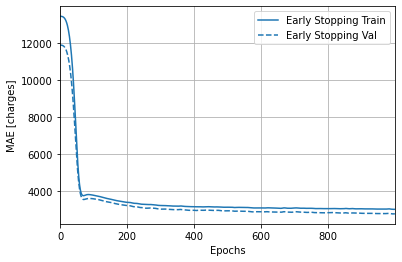

In [146]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylabel('MAE [charges]')

Как можно заметить из графика, после 200 `epoch` ошибка (mae) действительно падает незначительно. Поэтому, можно было установить значение `patience` и поменьше.

In [147]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} charges".format(mae))

5/5 - 0s - loss: 24110282.0000 - mae: 2930.1062 - mse: 24110260.0000
Testing set Mean Abs Error: 2930.11 charges


Значение mae для `test` дэйтасета немного больше, чем для `train/validation`, что я расцениваю как вполне нормальное явление. Разница не такая большая, чтобы назвать это переобучением.

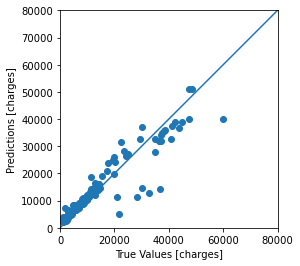

In [148]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [charges]')
plt.ylabel('Predictions [charges]')
lims = [0, 80000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [149]:
rmse = tf.keras.metrics.RootMeanSquaredError()
rmse.update_state(test_labels, test_predictions)
rmse = rmse.result().numpy()

In [150]:
sequential_metrics = []
sequential_metrics.append(rmse)
sequential_metrics.append(metrics.mean_squared_error(test_labels, test_predictions))
sequential_metrics.append(metrics.mean_absolute_error(test_labels, test_predictions))
sequential_metrics.append(metrics.r2_score(test_labels, test_predictions))
sequential_metrics.append(calc_adjusted_r2(test_labels, test_predictions,k=10))

In [151]:
metrics_pd["Sequential Deep Learning"] = sequential_metrics

In [152]:
metrics_pd

,Metrics,Linear Regression,Random Forest,Linear SVR,16-degree SVR,RBF SVR,Elastic Net,Sequential Deep Learning
0,RMSE,"5,053.33","4,562.95","13,507.62","11,792.22","13,765.19","8,820.33","4,910.22"
1,MSE,"25,536,179.29","20,820,478.09","182,455,839.42","139,056,557.39","189,480,477.93","77,798,268.50","24,110,254.40"
2,MAE,"2,906.49","2,377.06","6,980.98","7,214.50","8,931.80","6,464.68","2,930.11"
3,R-squared,0.84,0.87,-0.12,0.14,-0.17,0.52,0.85
4,Adjusted R-squared,0.83,0.86,-0.21,0.07,-0.26,0.48,0.84


Как можно заметить, модель глубинного обучения справилась одинаково хорошо с моделью линейной регрессии, показавшей лучший, после случайного леса, результат. Тогда как `mae` оказался на пару единиц хуже, такие метрики как `rmse`, `mse` и `r-squared` содержат результаты лучше, чем у модели линейной регрессии.  
Модель `deep learning` была сделана на основе <a href="https://www.tensorflow.org/tutorials/keras/regression#the_model" target="_blank">тьюториала</a> по `tensor flow/keras`. Вероятно, при должном тюнинге (с которым я пока плохо осведомлен), модель будет показывать результаты намного лучше.